## a. Create a scenario for Overfitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# Consider a subset of your data (adjust the size as needed)
subset_size = 0.2
subset_index = np.random.choice(df.index, size=int(len(df) * subset_size), replace=False)
subset_data = df.loc[subset_index]

In [4]:
# Features and labels
X_subset = subset_data.iloc[:, 1:-1]
y_subset = subset_data['label']
X_subset

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
833,129.199219,63,0.461898,0.112941,2525.853201,2840.025246,5595.916162,0.082227,-130.366364,84.285020,...,2.341791,2.747749,3.755346,3.782516,2.123274,3.137535,0.164653,2.397068,-4.111466,-1.762770
649,117.453835,57,0.469571,0.095390,2760.319304,2242.684060,5260.184859,0.171249,-86.246100,76.766210,...,-17.958157,9.875059,-19.041137,6.477010,-8.357155,4.880437,-11.784916,1.666488,-10.604684,-3.778448
202,112.347147,55,0.420833,0.214586,2800.075712,2773.102993,6003.997028,0.128437,-23.121368,71.354843,...,2.979177,0.839441,-1.143913,0.171212,-3.301184,0.184627,-1.214675,-1.564522,-2.753659,-2.114731
853,198.768029,97,0.322454,0.114278,1788.452910,2120.847680,3820.060234,0.076022,-150.893951,111.768735,...,-0.890186,-5.354467,0.690162,-1.223388,-5.050071,-5.070661,-8.562772,-7.983103,-5.301220,-1.455191
812,161.499023,69,0.440458,0.210812,2455.989277,2559.722919,5054.369437,0.088272,-105.677889,76.102924,...,0.992694,-2.192463,-1.506213,2.640891,2.120583,1.428914,3.844995,5.693852,-0.138507,-1.555092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,151.999081,70,0.253737,0.111775,1760.324104,1792.655893,3460.670740,0.085669,-173.264638,111.665344,...,-10.320426,4.667860,-11.803071,3.226289,-7.989409,0.079735,-3.574567,-0.442835,-2.098590,-4.893750
549,107.666016,53,0.357398,0.118614,1304.575756,1636.561792,2723.916862,0.046275,-189.889800,134.417420,...,-7.929965,-1.141196,-5.041017,2.413433,-5.010100,-2.155745,-4.240500,1.840860,-0.440288,-4.768059
594,80.749512,38,0.325405,0.071399,2861.040477,2566.590601,5606.299433,0.147577,-131.907555,61.585757,...,6.416425,3.422568,-2.887963,3.226356,-1.340070,0.873017,3.681538,0.637190,-0.369353,6.323373
656,99.384014,48,0.487132,0.150219,2751.908964,2205.673206,5234.418348,0.166710,-43.033790,75.391379,...,-7.353392,15.969377,-13.137336,12.259780,-10.445485,5.937640,-6.679900,5.277037,-2.329495,3.591018


In [5]:
y_subset

833     reggae
649      metal
202    country
853     reggae
812     reggae
        ...   
587       jazz
549       jazz
594       jazz
656      metal
673      metal
Name: label, Length: 200, dtype: object

## b. Prove the overfitting with evidence

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [7]:
# Split the subset data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42
)
X_train

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
214,95.703125,47,0.429776,0.236616,3191.425441,2948.092201,6926.274784,0.156879,12.194375,58.978615,...,-2.157941,1.195224,0.473081,4.409821,-0.169009,3.103832,-1.181561,4.545529,0.862358,1.268424
594,80.749512,38,0.325405,0.071399,2861.040477,2566.590601,5606.299433,0.147577,-131.907555,61.585757,...,6.416425,3.422568,-2.887963,3.226356,-1.340070,0.873017,3.681538,0.637190,-0.369353,6.323373
915,99.384014,47,0.376780,0.203785,1542.205910,1591.924670,2870.199311,0.077020,-62.348380,153.770773,...,-8.383072,7.204514,-2.524919,4.834071,-6.272217,-0.725831,-2.277204,-5.243365,-5.218907,-6.279709
903,117.453835,56,0.402190,0.160759,2807.320920,2688.491155,5678.498996,0.148372,-35.371326,73.674565,...,-0.388112,-1.314756,-2.047162,2.530268,3.606460,-3.538504,-4.790396,-2.500228,-3.977557,-0.824020
500,64.599609,28,0.171782,0.108786,1039.623420,1422.303098,1838.213885,0.047769,-270.264822,137.571726,...,-5.434449,-5.186267,-6.990923,-3.236812,-2.007815,4.412518,1.991310,4.985073,6.582728,-2.426803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,99.384014,50,0.555543,0.118441,2291.228694,1583.389517,3884.859842,0.180318,-76.349050,123.295128,...,-3.924473,5.402771,-2.487087,5.040152,-2.983726,5.110503,-4.384120,-1.286540,3.086148,0.176513
345,103.359375,51,0.436165,0.173815,3087.386905,2812.593397,6529.785515,0.156307,-23.899437,61.224604,...,-5.509934,1.060334,-2.439218,-0.566657,-1.557977,-0.897292,-6.734258,-3.709435,-4.459730,-0.771205
98,89.102909,44,0.452728,0.200889,2030.485224,1987.320416,4062.942099,0.103386,-57.978792,108.989111,...,-6.047029,13.862625,-11.287123,4.663286,-6.388998,3.213775,-8.078659,-1.723662,-5.422675,-2.582366
244,112.347147,54,0.365068,0.144322,1935.137600,1970.130683,4048.792184,0.094770,-99.297394,117.560930,...,-8.745017,8.410167,-6.846654,0.434208,-5.308398,1.643460,-7.356874,0.516017,-1.461594,-5.921085


In [8]:
# Original complex model without regularization
original_model = SVC(kernel='rbf', C=1.0, gamma='scale')
original_model.fit(X_train, y_train)

SVC()

In [9]:
from sklearn.metrics import accuracy_score
y_train_pred = original_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.25625


In [10]:
y_test_pred = original_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.225


In [11]:
if training_accuracy > test_accuracy:
    print("Model is likely overfitting.")

Model is likely overfitting.


## c. Regularization methods

In [17]:
# Regularized models
from sklearn.linear_model import LogisticRegression
l1_model = SVC(kernel='linear', C=0.1)
l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)

In [18]:
original_cv_scores = cross_val_score(original_model, X_train, y_train, cv=5, scoring='accuracy')
l1_cv_scores = cross_val_score(l1_model, X_train, y_train, cv=5, scoring='accuracy')
l2_cv_scores = cross_val_score(l2_model, X_train, y_train, cv=5, scoring='accuracy')

In [19]:
original_accuracy = accuracy_score(y_test, original_model.predict(X_test))
print(f"\nOriginal Accuracy: {original_accuracy}")
print(f"Original Cross-Validation Scores: {original_cv_scores.mean()}")

# Print L1 regularization results
l1_model.fit(X_train, y_train)
l1_accuracy = accuracy_score(y_test, l1_model.predict(X_test))
print(f"\nL1 Regularization Accuracy: {l1_accuracy}")
print(f"L1 Regularization Cross-Validation Scores: {l1_cv_scores.mean()}")

# Print L2 regularization results
l2_model.fit(X_train, y_train)
l2_accuracy = accuracy_score(y_test, l2_model.predict(X_test))
print(f"\nL2 Regularization Accuracy: {l2_accuracy}")
print(f"L2 Regularization Cross-Validation Scores: {l2_cv_scores.mean()}")


Original Accuracy: 0.225
Original Cross-Validation Scores: 0.225

L1 Regularization Accuracy: 0.45
L1 Regularization Cross-Validation Scores: 0.4125

L2 Regularization Accuracy: 0.475
L2 Regularization Cross-Validation Scores: 0.375


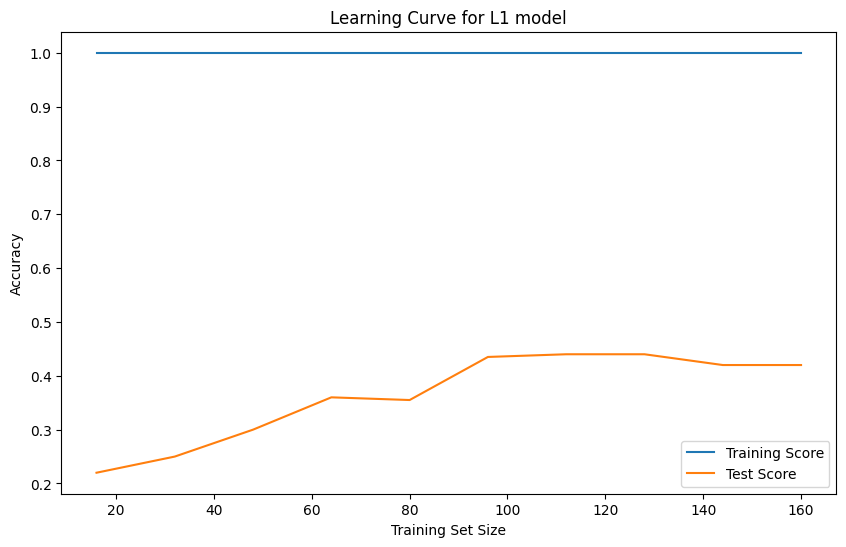

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores_1, test_scores_1 = learning_curve(
    l1_model, X_subset, y_subset, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_1, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_1, axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for L1 model')
plt.legend()
plt.show()

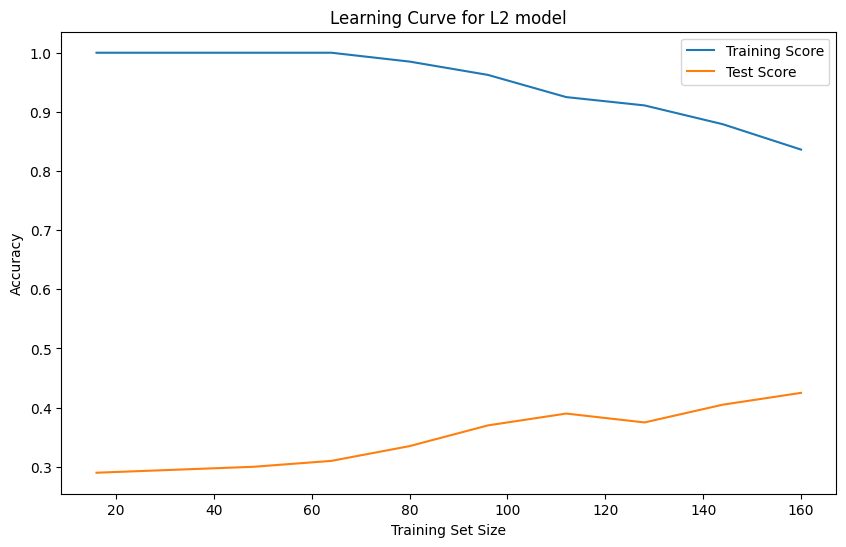

In [16]:
train_sizes, train_scores_2, test_scores_2 = learning_curve(
    l2_model, X_subset, y_subset, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_2, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_2, axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for L2 model')
plt.legend()
plt.show()